In [1]:
!pip install pandas matplotlib seaborn numpy

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
wine = pd.read_csv('winequalityN.csv')

In [4]:
# Check first five wines
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
pred_test = wine.iloc[3]

In [6]:
pred_test['type'] = 1
pred_test.drop(['quality', 'total sulfur dioxide'],inplace=True)
#pred_test.drop('total_sulfur_dioxide',inplace=True)
pred_test

type                        1
fixed acidity             7.2
volatile acidity         0.23
citric acid              0.32
residual sugar            8.5
chlorides               0.058
free sulfur dioxide      47.0
density                0.9956
pH                       3.19
sulphates                 0.4
alcohol                   9.9
Name: 3, dtype: object

In [7]:
# rows and columns
wine.shape

(6497, 13)

In [8]:
# Checking null in each column
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [43]:
# One to remove na values is just by dropping them since they are very few
wine.dropna()
#another way is to impute let's say average value 
#wine.update(wine.fillna(wine.mean()))

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [44]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
# Wine counts between red and white, alternatively run value_counts(normalize=True) for percentage
wine['type'].value_counts()

type
white    4898
red      1599
Name: count, dtype: int64

<Axes: xlabel='type', ylabel='count'>

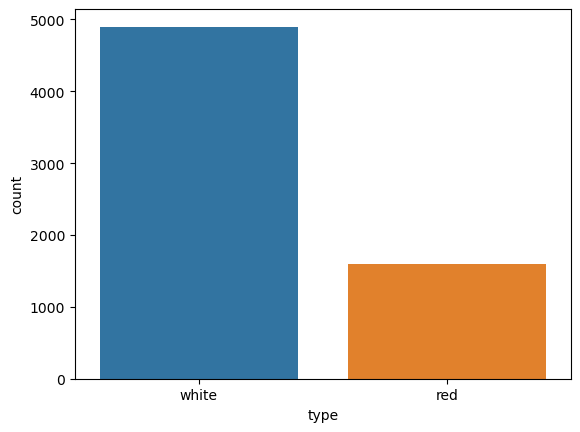

In [13]:
# Alternatively you can visualize the data as a graph using seaborn.
sns.countplot(x="type",data=wine)

In [14]:
wine['type'].value_counts(normalize=True)

type
white    0.753886
red      0.246114
Name: proportion, dtype: float64

<Axes: >

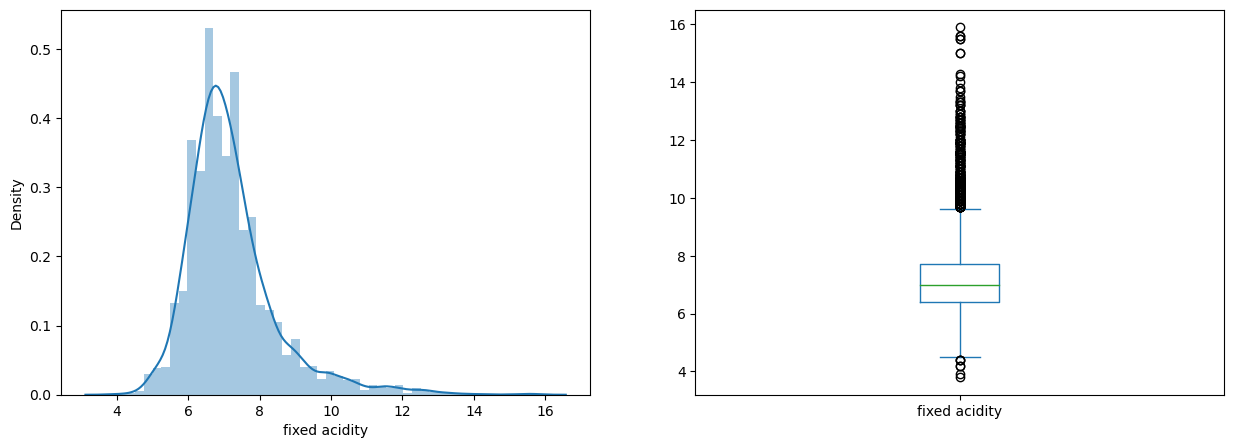

In [15]:
# Checking distribution and outlier for each variable
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['fixed acidity'])
plt.subplot(122)
wine['fixed acidity'].plot.box(figsize=(15,5))

<Axes: >

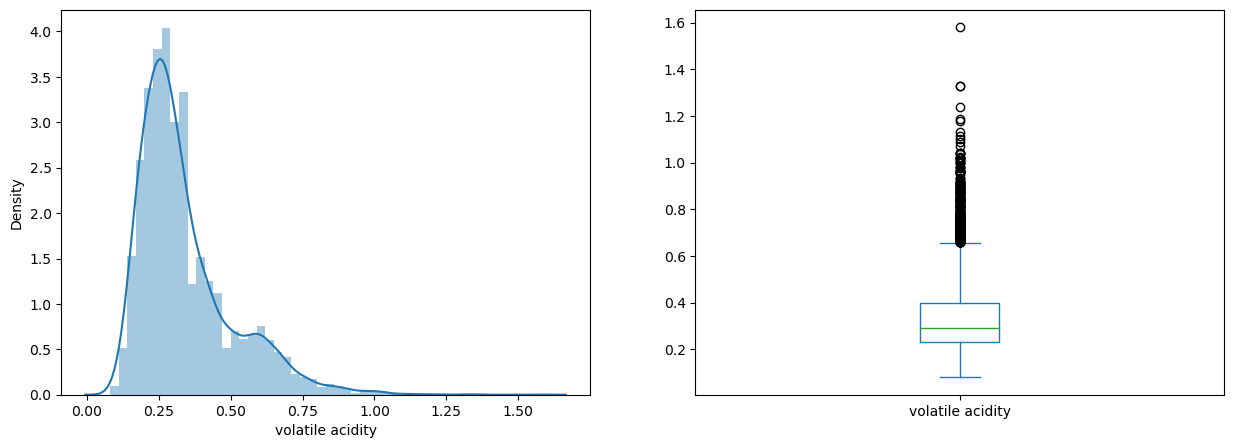

In [16]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['volatile acidity'])
plt.subplot(122)
wine['volatile acidity'].plot.box(figsize=(15,5))

<Axes: >

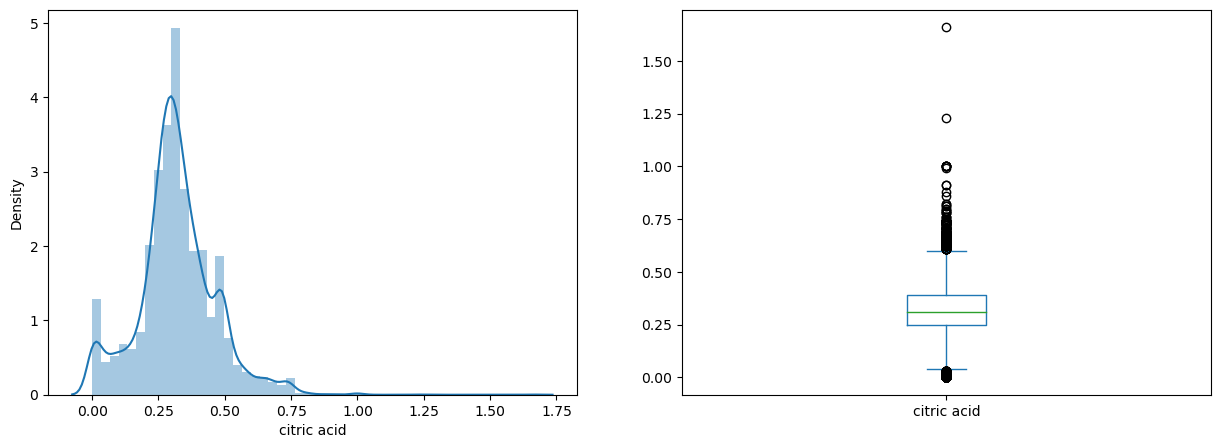

In [17]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['citric acid'])
plt.subplot(122)
wine['citric acid'].plot.box(figsize=(15,5))

<Axes: >

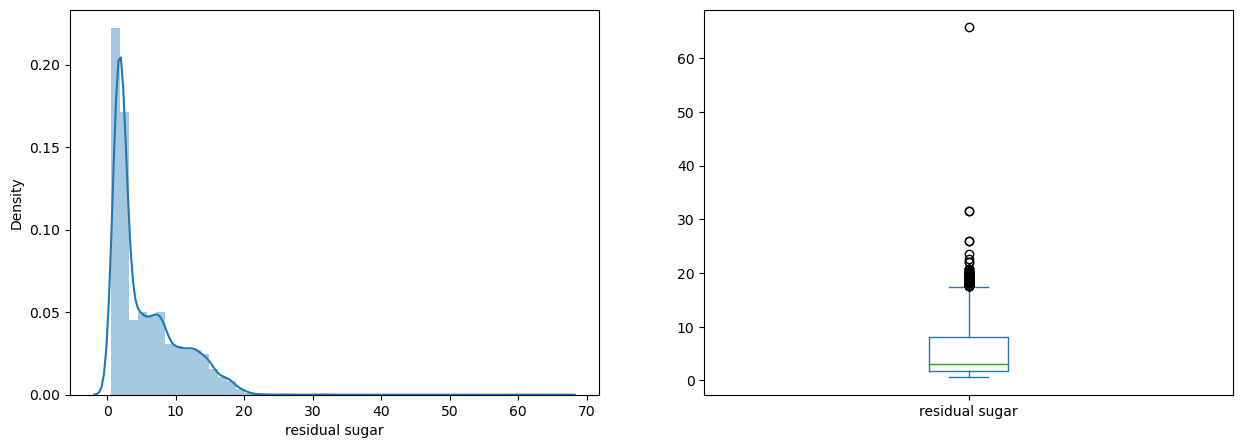

In [18]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['residual sugar'])
plt.subplot(122)
wine['residual sugar'].plot.box(figsize=(15,5))

<Axes: >

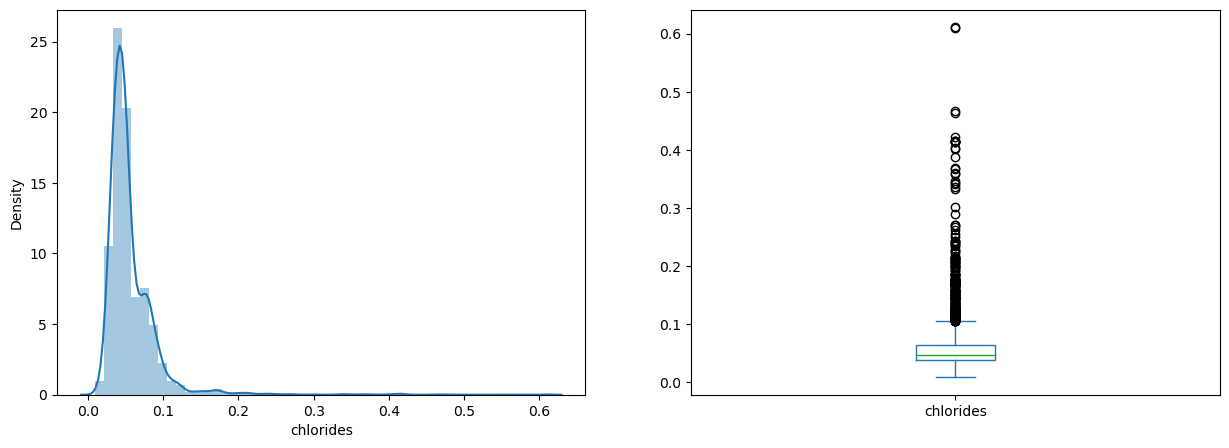

In [19]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['chlorides'])
plt.subplot(122)
wine['chlorides'].plot.box(figsize=(15,5))

<Axes: >

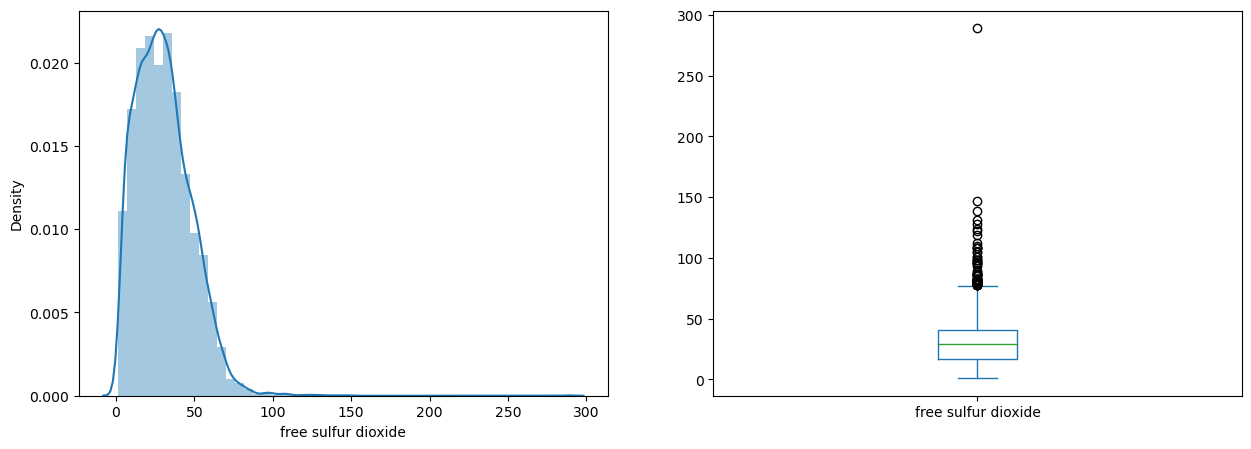

In [20]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['free sulfur dioxide'])
plt.subplot(122)
wine['free sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

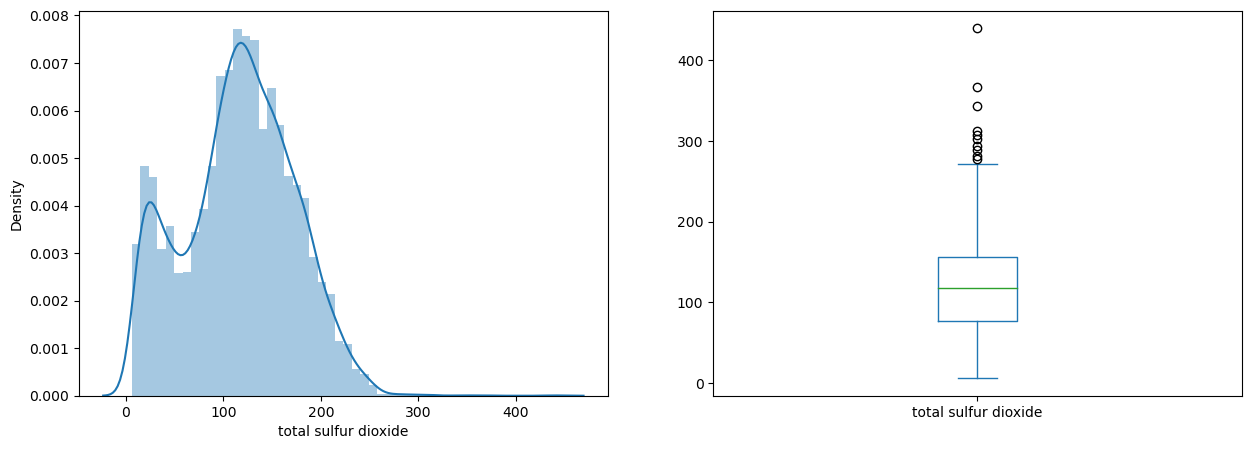

In [21]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['total sulfur dioxide'])
plt.subplot(122)
wine['total sulfur dioxide'].plot.box(figsize=(15,5))

<Axes: >

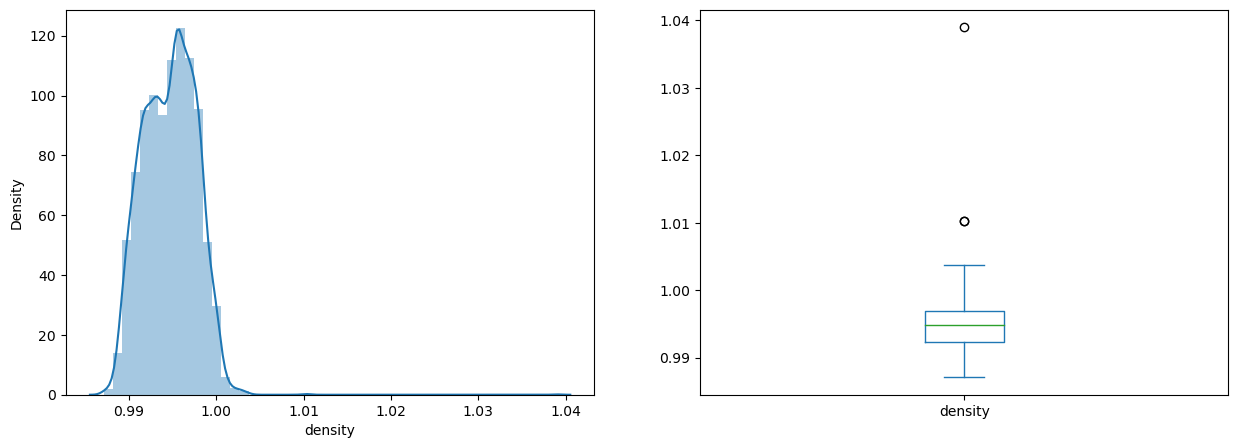

In [22]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['density'])
plt.subplot(122)
wine['density'].plot.box(figsize=(15,5))

<Axes: >

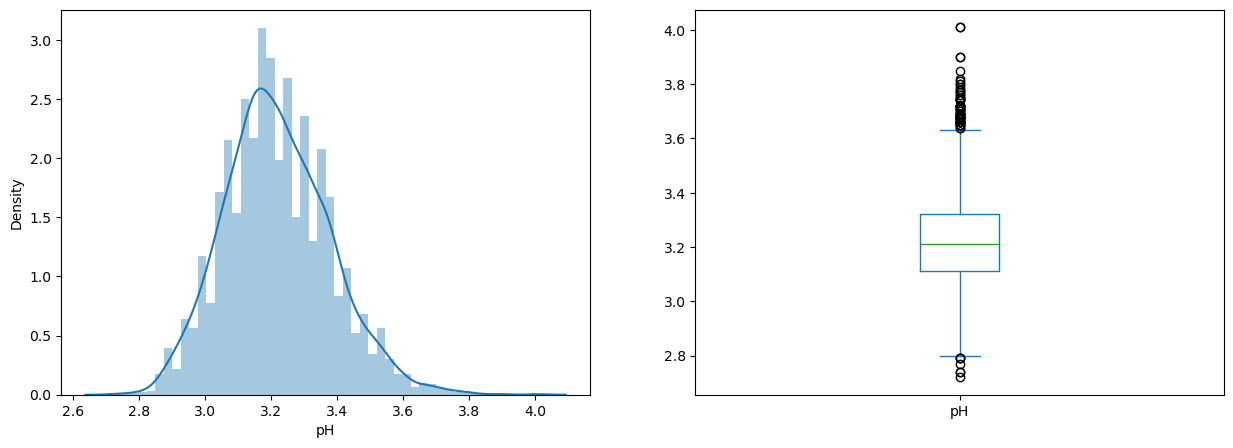

In [23]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['pH'])
plt.subplot(122)
wine['pH'].plot.box(figsize=(15,5))

<Axes: >

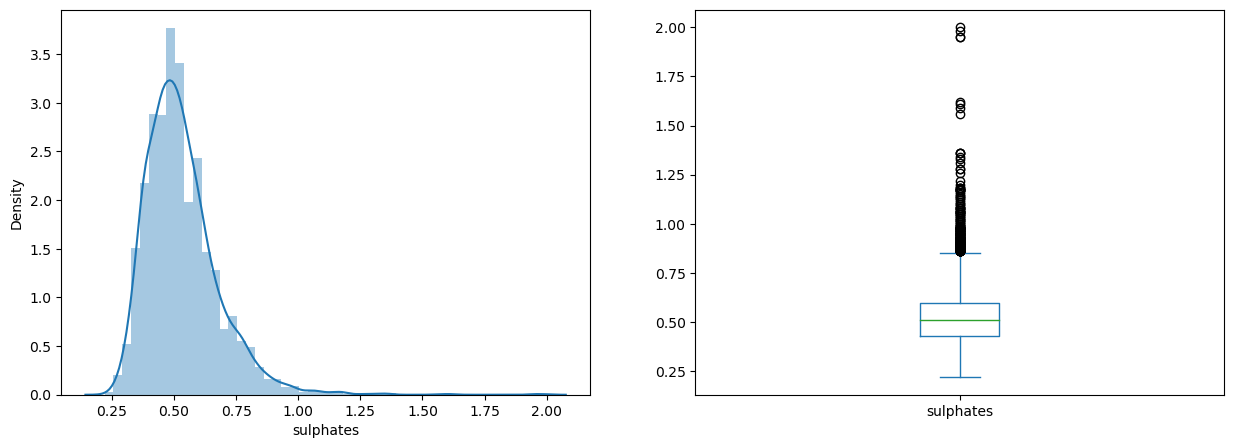

In [24]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['sulphates'])
plt.subplot(122)
wine['sulphates'].plot.box(figsize=(15,5))

<Axes: >

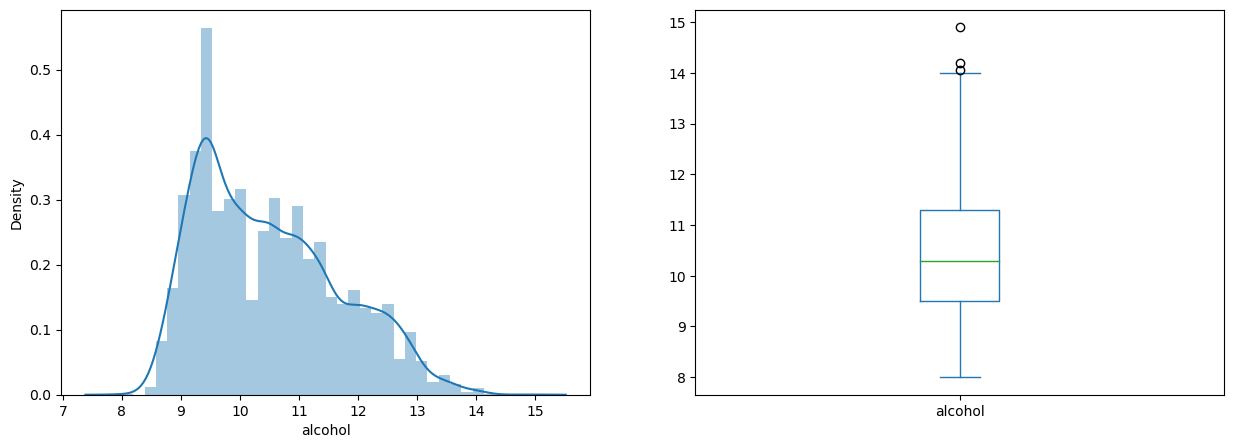

In [25]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['alcohol'])
plt.subplot(122)
wine['alcohol'].plot.box(figsize=(15,5))

<Axes: >

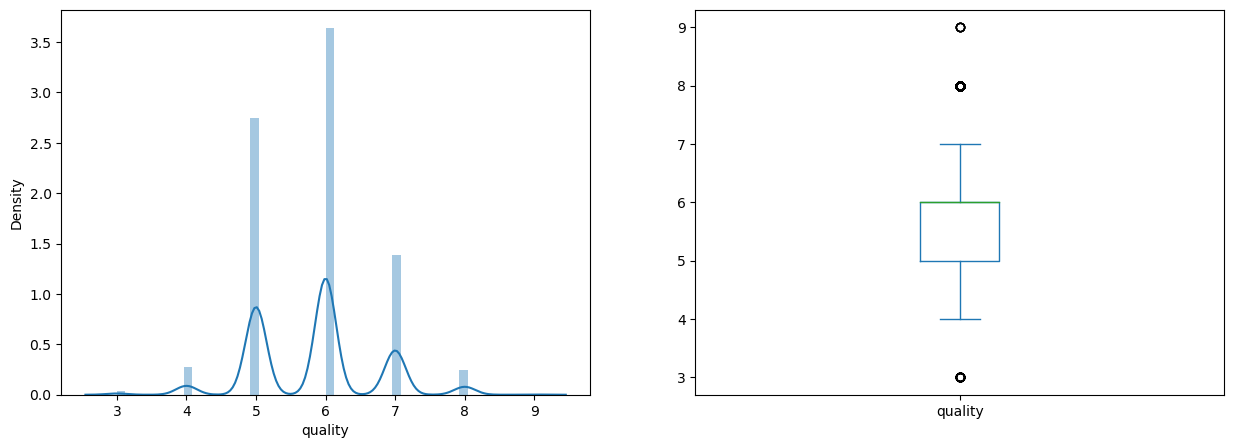

In [26]:
plt.figure(2)
plt.subplot(121)
sns.distplot(wine['quality'])
plt.subplot(122)
wine['quality'].plot.box(figsize=(15,5))

<Axes: xlabel='quality', ylabel='fixed acidity'>

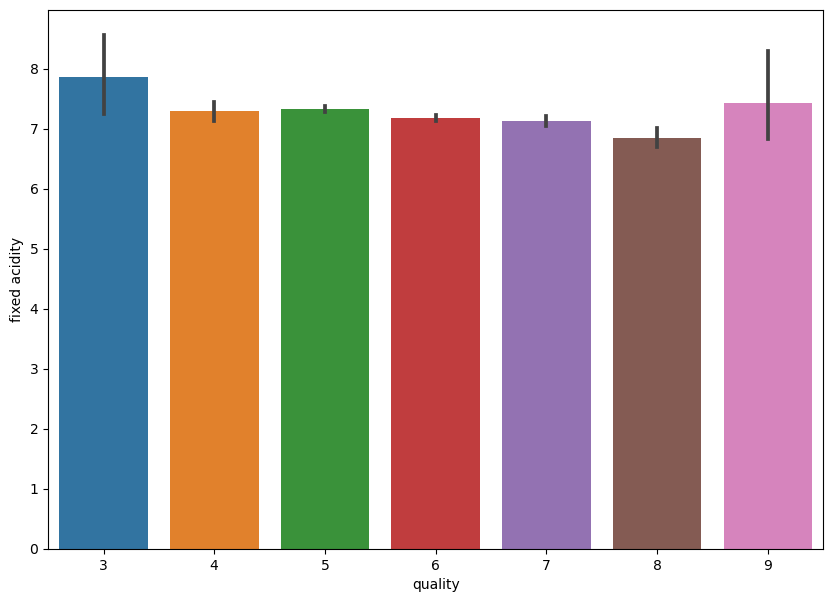

In [27]:
# Bivariate analysis to check quality with all the other variables to show how each variable is connected to quality.
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='fixed acidity', data=wine)

<Axes: xlabel='quality', ylabel='volatile acidity'>

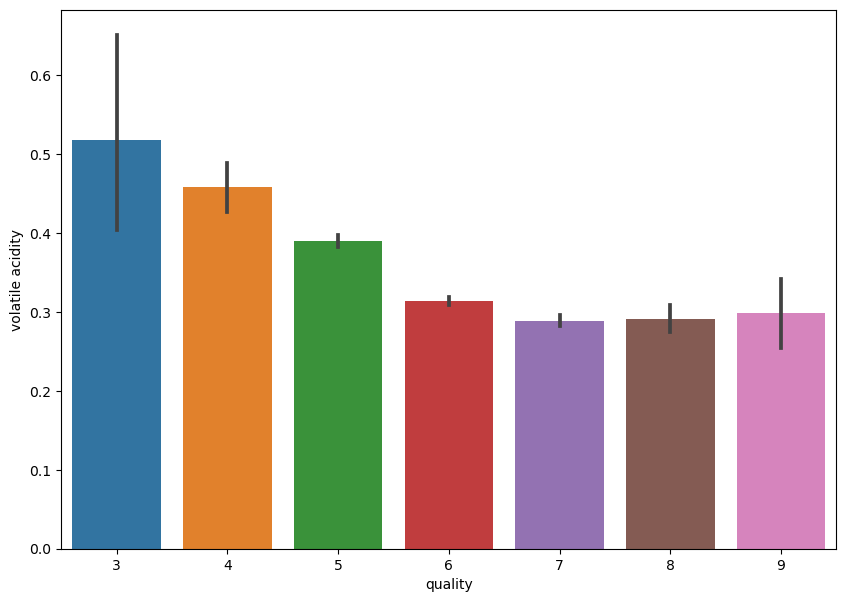

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='volatile acidity', data=wine)

<Axes: xlabel='quality', ylabel='citric acid'>

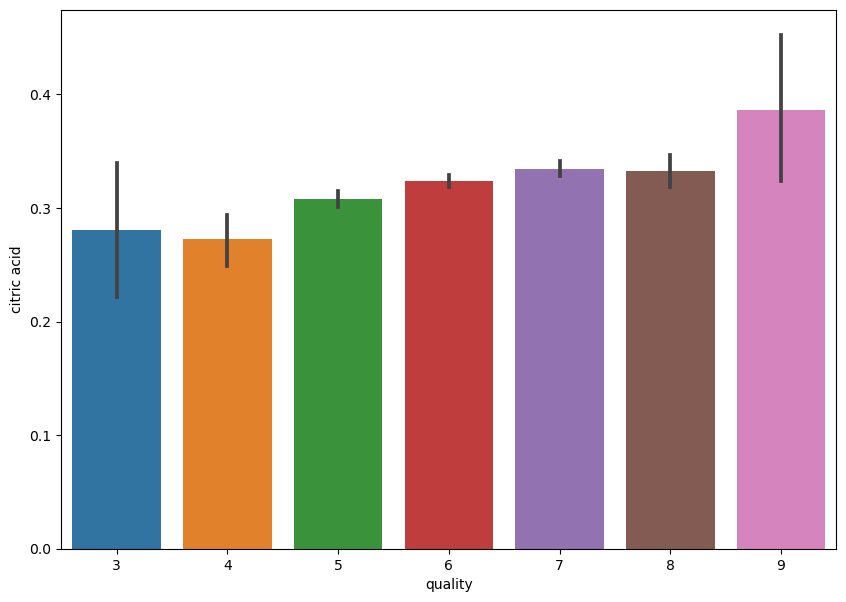

In [29]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='citric acid', data=wine)

<Axes: xlabel='quality', ylabel='residual sugar'>

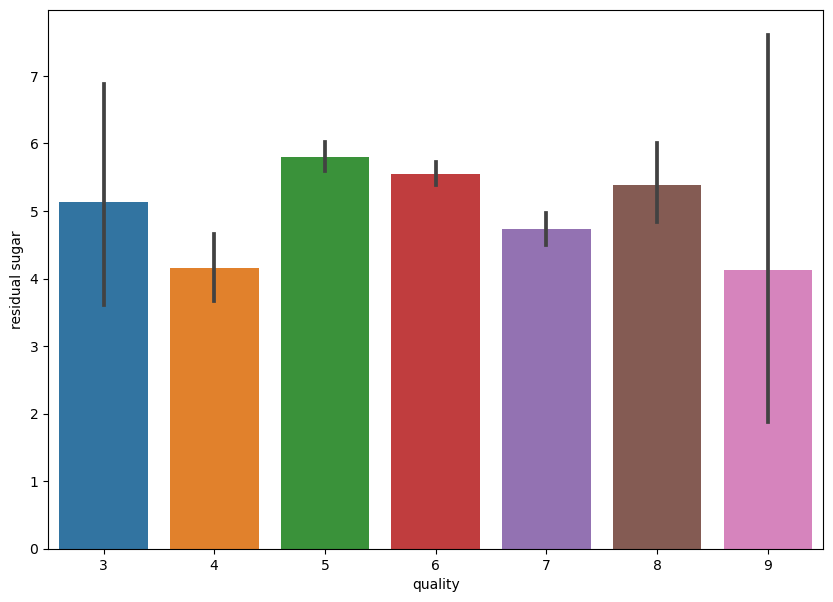

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='residual sugar', data=wine)

<Axes: xlabel='quality', ylabel='chlorides'>

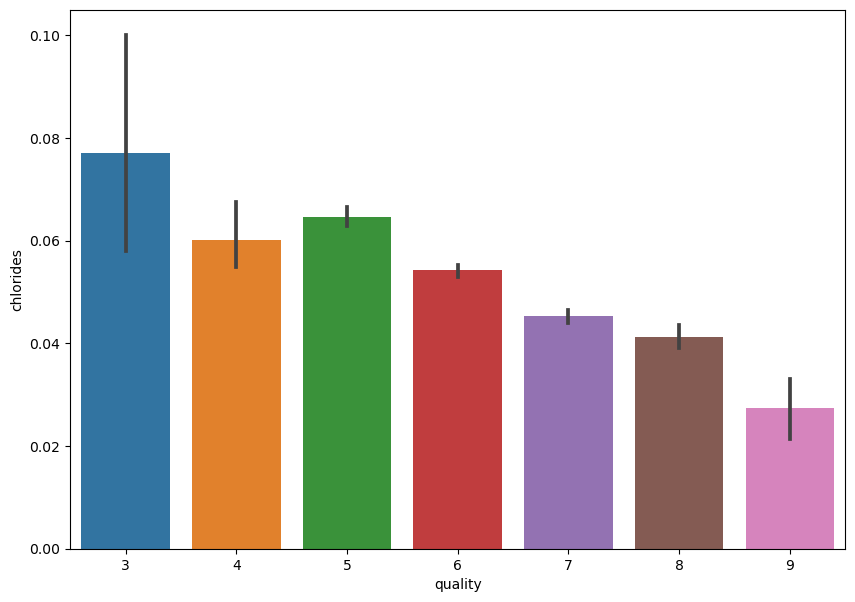

In [31]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='chlorides', data=wine)

In [ ]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='free sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='total sulfur dioxide'>

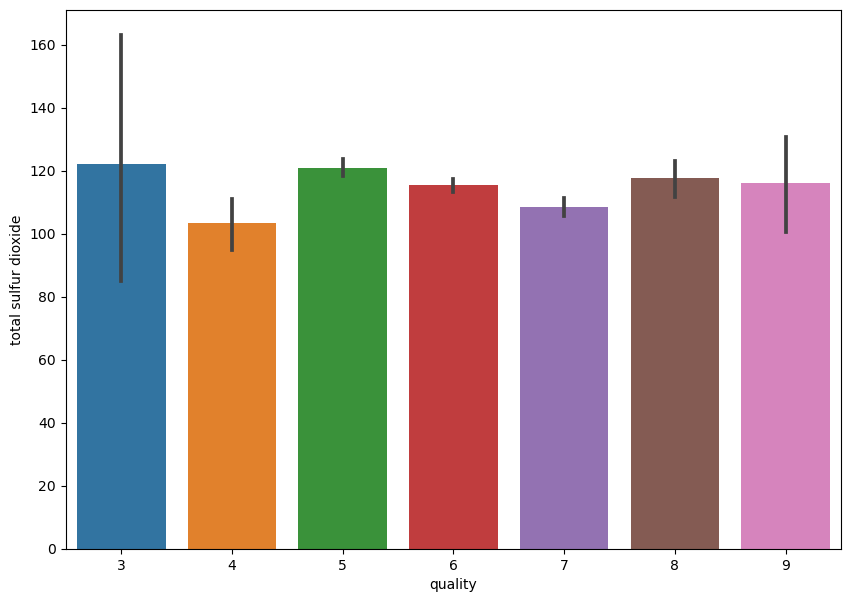

In [33]:
plt.figure(figsize=(10, 7))
sns.barplot(x='quality', y='total sulfur dioxide', data=wine)

<Axes: xlabel='quality', ylabel='density'>

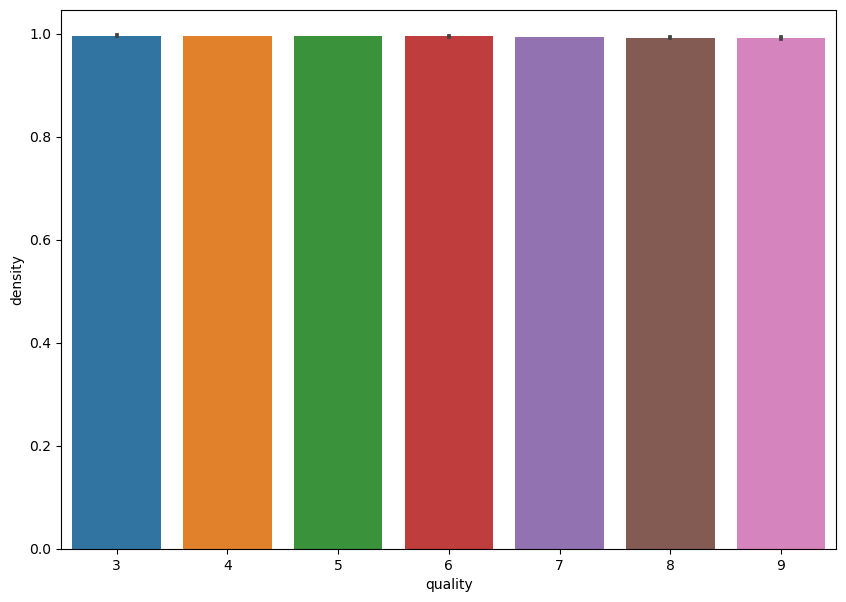

In [34]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='density', data=wine)

<Axes: xlabel='quality', ylabel='pH'>

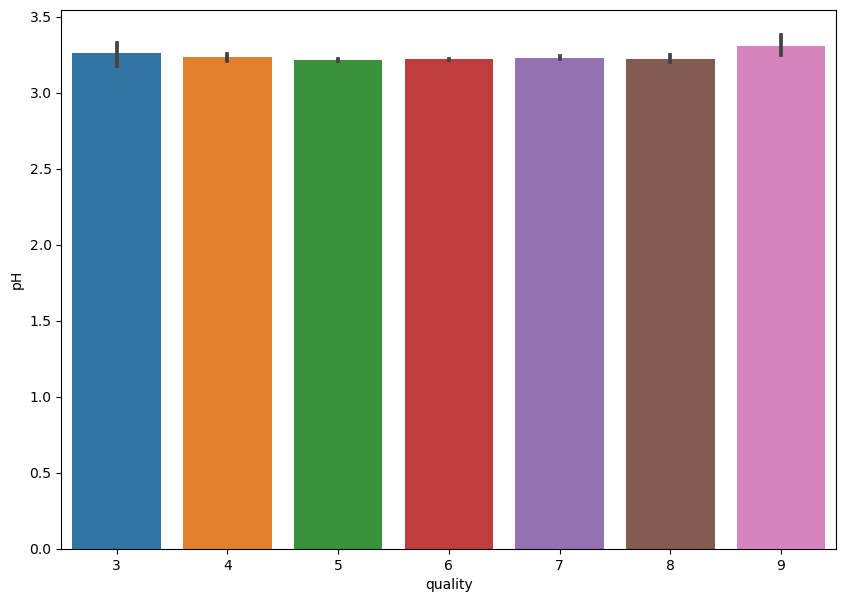

In [35]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='pH', data=wine)

<Axes: xlabel='quality', ylabel='sulphates'>

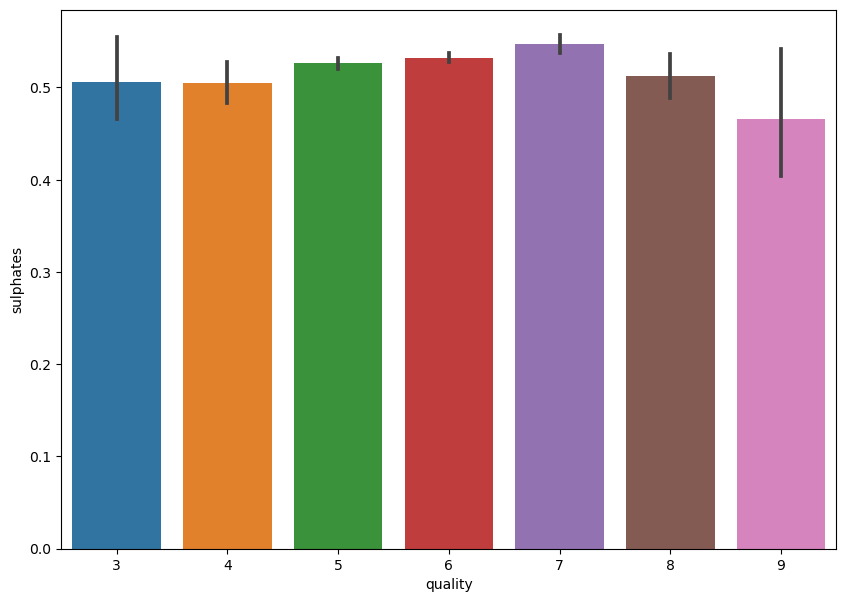

In [36]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='sulphates', data=wine)

<Axes: xlabel='quality', ylabel='alcohol'>

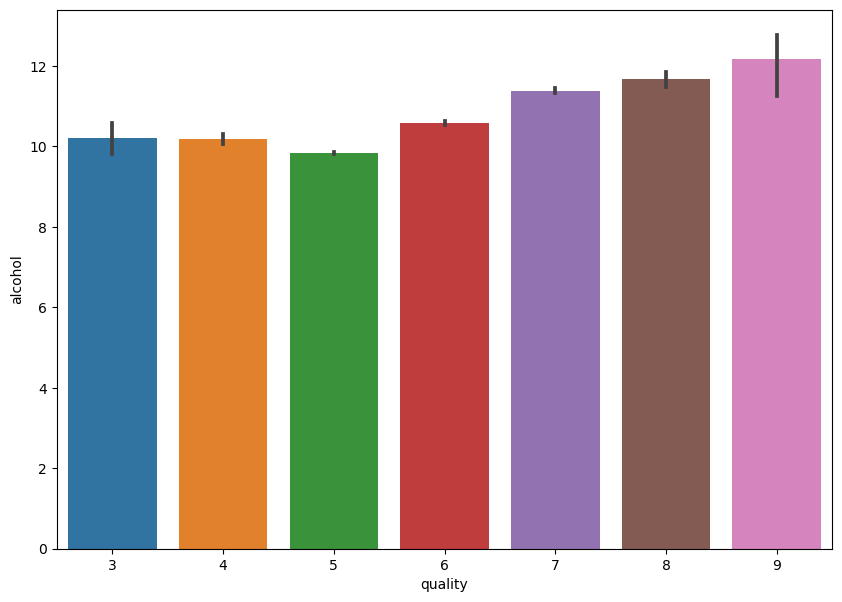

In [37]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='alcohol', data=wine)

<Axes: xlabel='quality', ylabel='quality'>

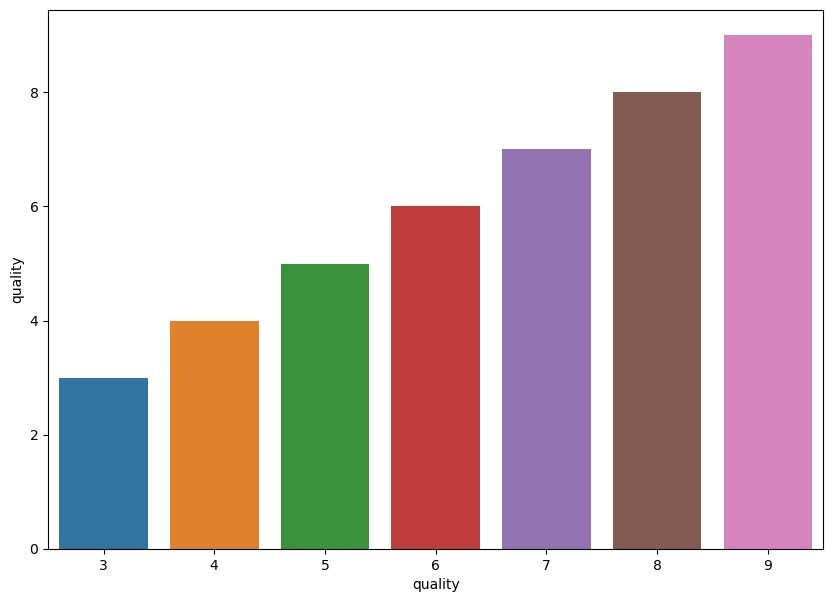

In [38]:
plt.figure(figsize=(10,7))
sns.barplot(x='quality', y='quality', data=wine)

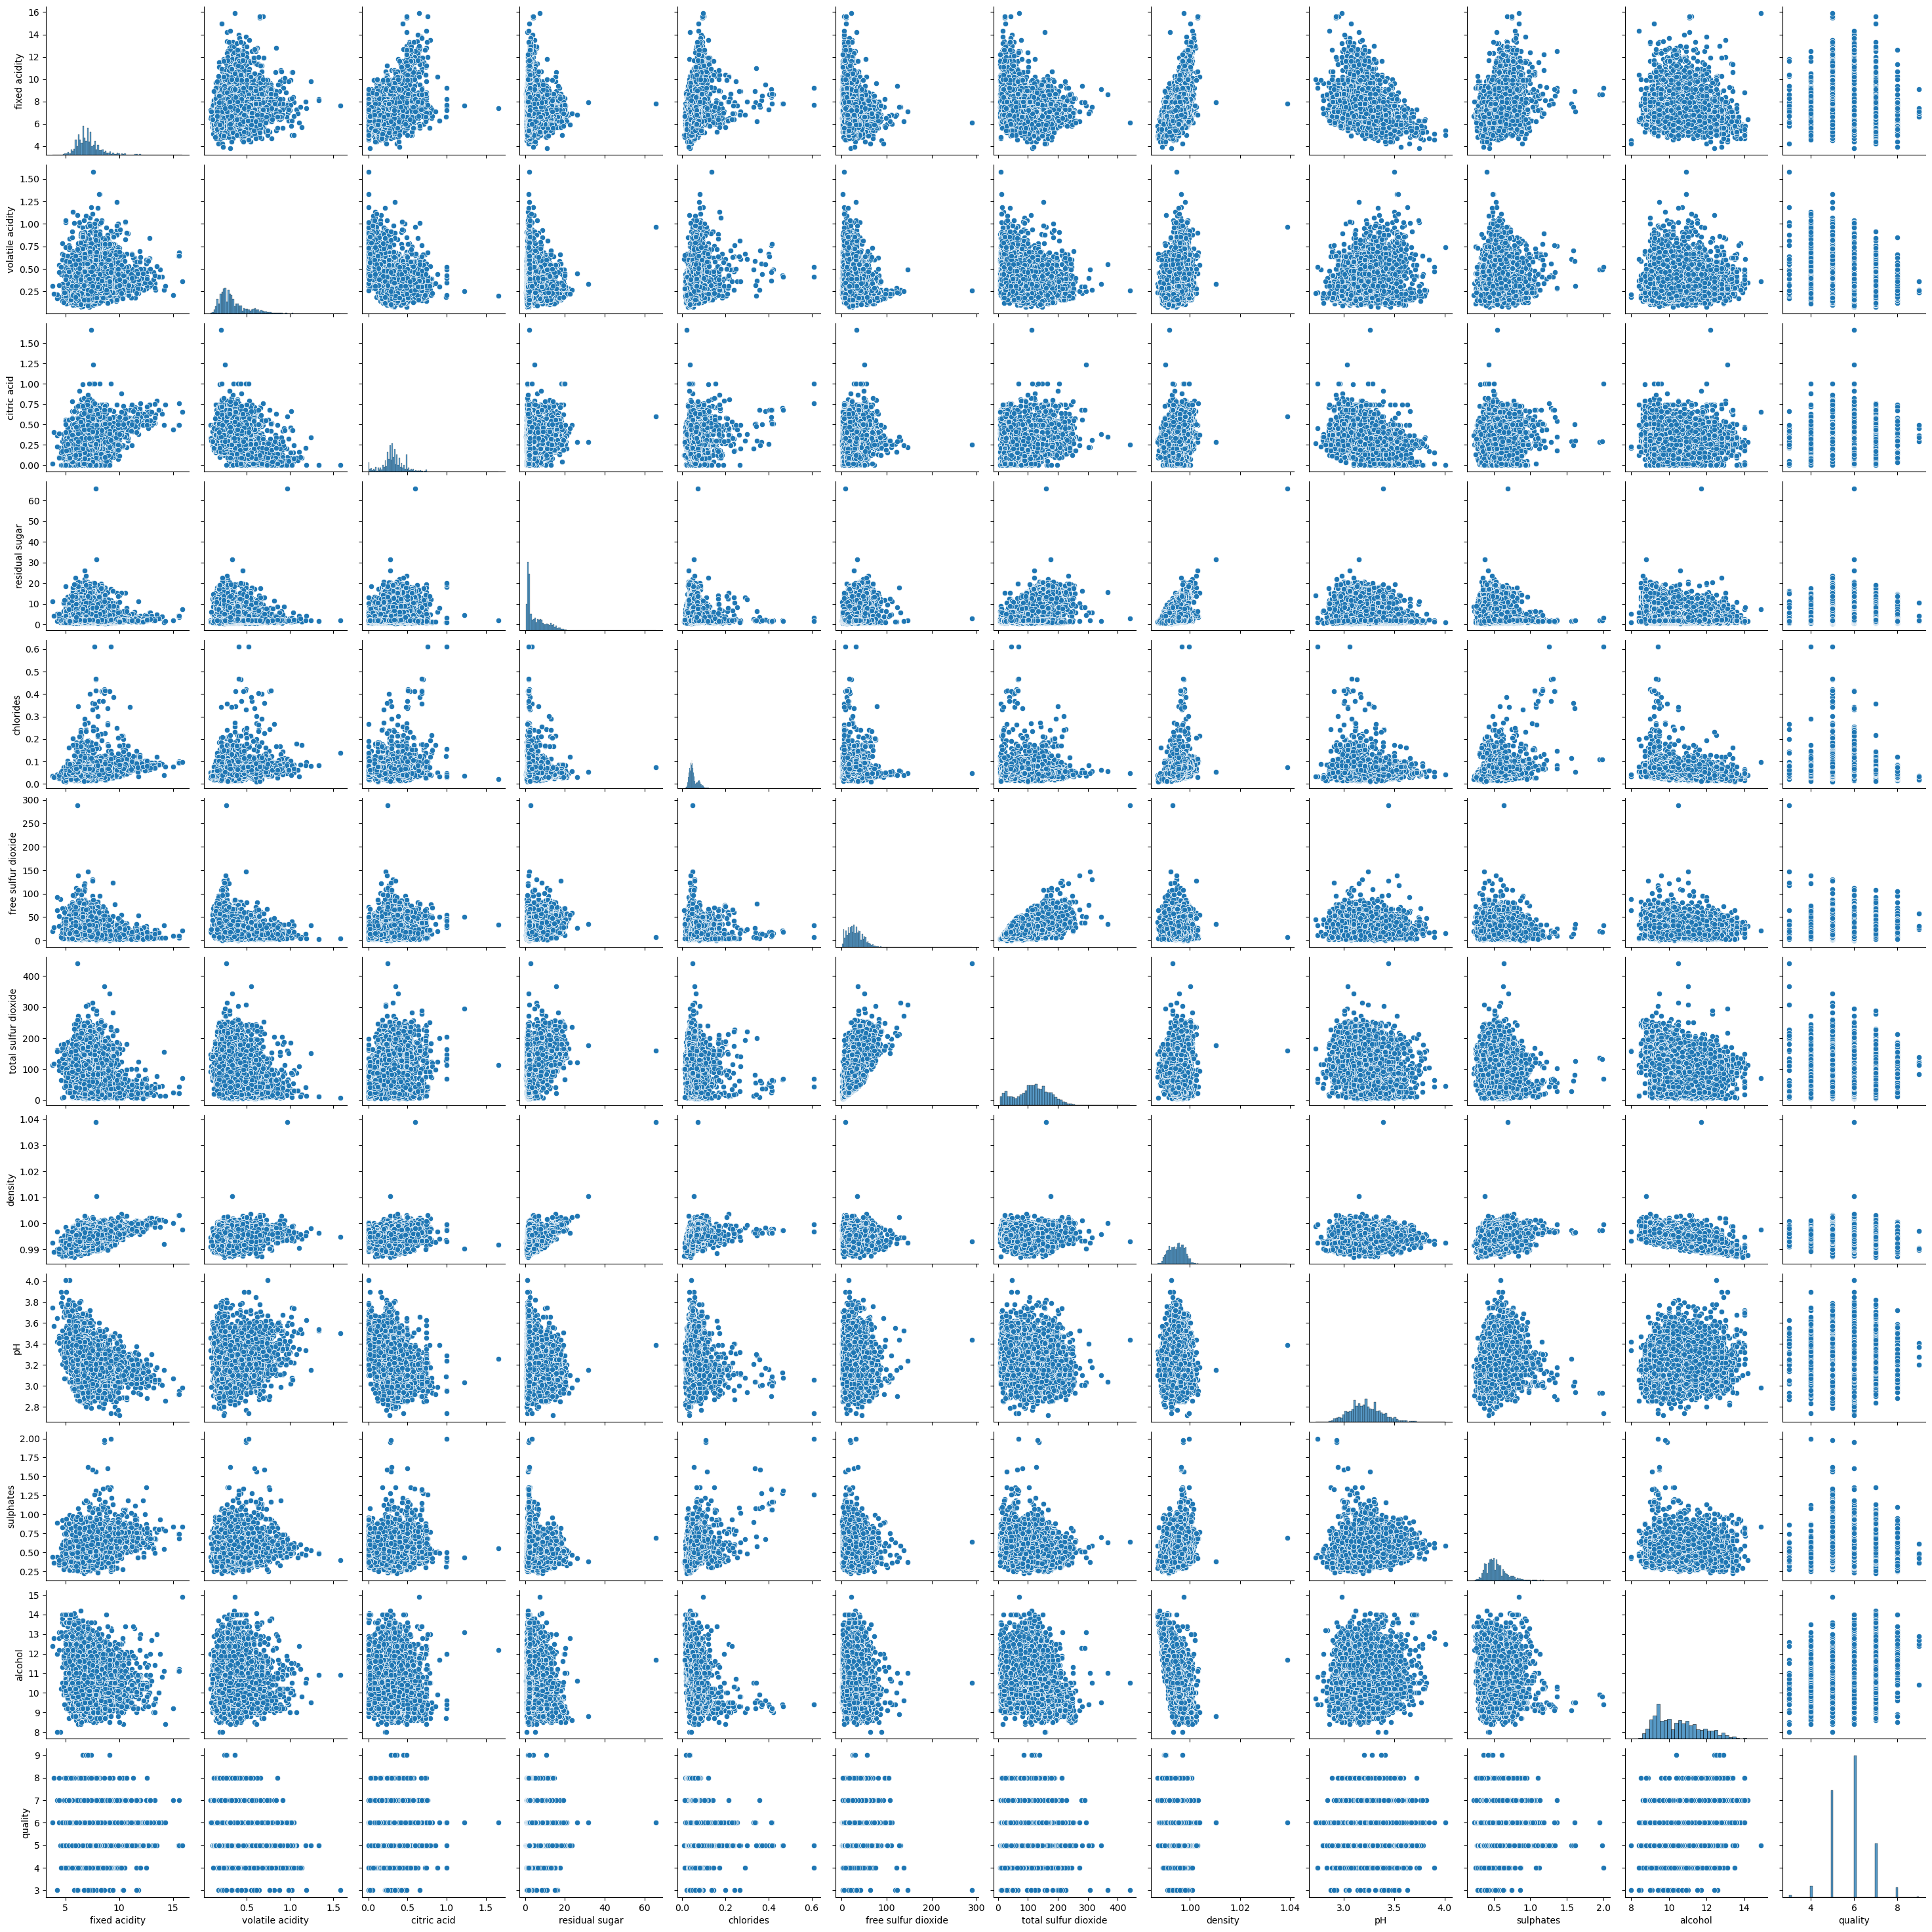

In [39]:
#Plotting all variables for their distribution and relation
sns.pairplot(wine)

In [50]:
# Convert 'type' column to numeric (0 for red, 1 for white)
wine['type'] = wine['type'].map({'red': 0, 'white': 1})

# Dropping non-numeric columns before calculating correlation
numeric_wine = wine.select_dtypes(include=[np.number])
correlation_matrix = numeric_wine.corr()
print(correlation_matrix)

#checking correlation
wine.corr()

                          type  fixed acidity  volatile acidity  citric acid  \
type                  1.000000      -0.487241         -0.652875     0.187126   
fixed acidity        -0.487241       1.000000          0.220172     0.323736   
volatile acidity     -0.652875       0.220172          1.000000    -0.378061   
citric acid           0.187126       0.323736         -0.378061     1.000000   
residual sugar        0.349000      -0.112319         -0.196702     0.142486   
chlorides            -0.512622       0.298421          0.377167     0.039315   
free sulfur dioxide   0.471644      -0.283317         -0.353230     0.133437   
total sulfur dioxide  0.700357      -0.329747         -0.414928     0.195218   
density              -0.390645       0.459204          0.271193     0.096320   
pH                   -0.328727      -0.251814          0.260660    -0.328689   
sulphates            -0.486916       0.300380          0.225476     0.057613   
alcohol               0.032970      -0.0

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,1.000000,-0.487241,-0.652875,0.187126,0.349000,-0.512622,0.471644,0.700357,-0.390645,-0.328727,-0.486916,0.032970,0.119323
fixed acidity,-0.487241,1.000000,0.220172,0.323736,-0.112319,0.298421,-0.283317,-0.329747,0.459204,-0.251814,0.300380,-0.095603,-0.077031
volatile acidity,-0.652875,0.220172,1.000000,-0.378061,-0.196702,0.377167,-0.353230,-0.414928,0.271193,0.260660,0.225476,-0.038248,-0.265953
citric acid,0.187126,0.323736,-0.378061,1.000000,0.142486,0.039315,0.133437,0.195218,0.096320,-0.328689,0.057613,-0.010433,0.085706
residual sugar,0.349000,-0.112319,-0.196702,0.142486,1.000000,-0.128902,0.403439,0.495820,0.552498,-0.267050,-0.185745,-0.359706,-0.036825
chlorides,-0.512622,0.298421,0.377167,0.039315,-0.128902,1.000000,-0.195042,-0.279580,0.362594,0.044806,0.395332,-0.256861,-0.200886
free sulfur dioxide,0.471644,-0.283317,-0.353230,0.133437,0.403439,-0.195042,1.000000,0.720934,0.025717,-0.145191,-0.188489,-0.179838,0.055463
total sulfur dioxide,0.700357,-0.329747,-0.414928,0.195218,0.495820,-0.279580,0.720934,1.000000,0.032395,-0.237687,-0.275381,-0.265740,-0.041385
density,-0.390645,0.459204,0.271193,0.096320,0.552498,0.362594,0.025717,0.032395,1.000000,0.011920,0.259454,-0.686745,-0.305858
pH,-0.328727,-0.251814,0.260660,-0.328689,-0.267050,0.044806,-0.145191,-0.237687,0.011920,1.000000,0.191248,0.121002,0.019366


<Axes: >

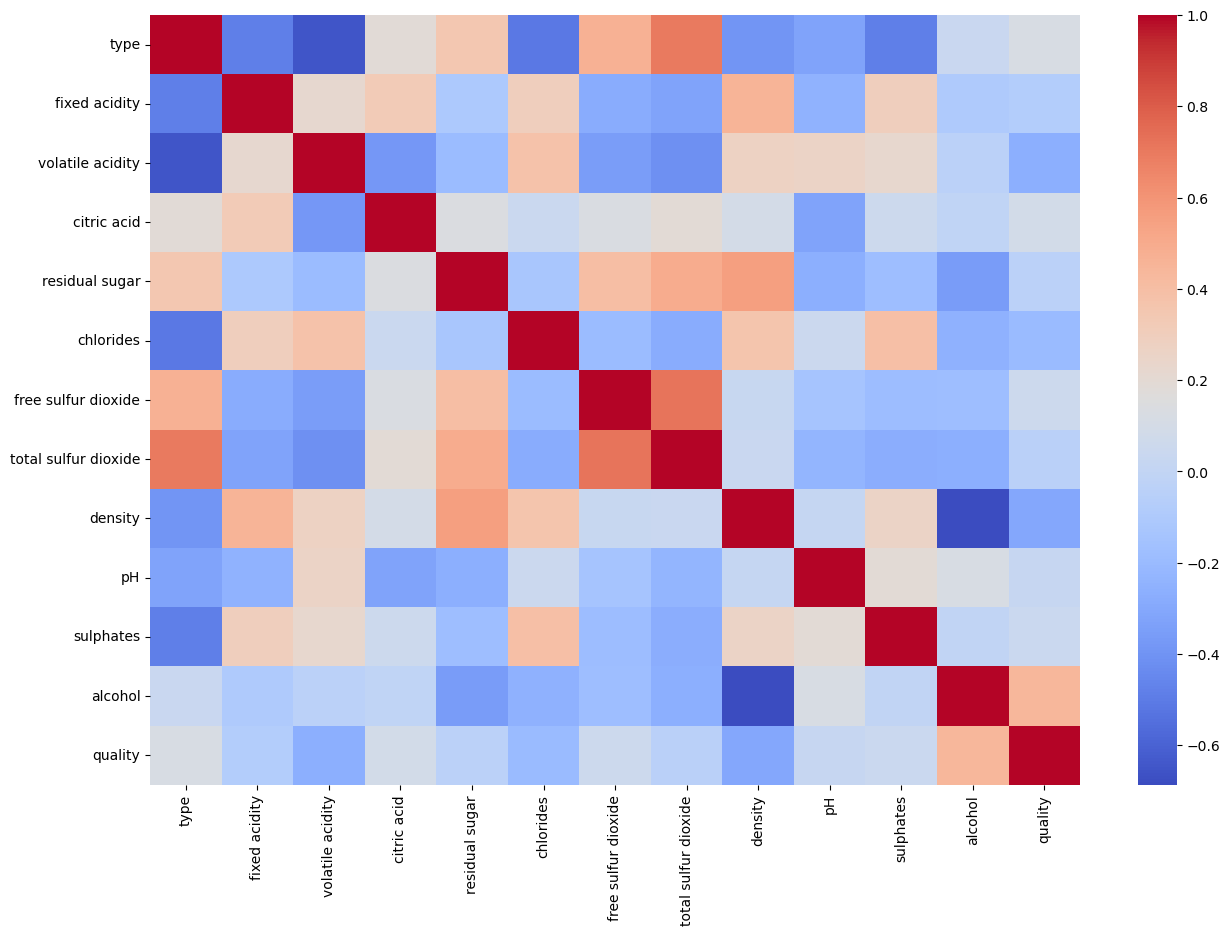

In [51]:
#buidling heatmap
plt.figure(figsize=(15,10))
sns.heatmap(wine.corr(), cmap='coolwarm')

In [52]:
# Dropping highly correlated variables - in this case total sulfur dioxide
wine_new = wine.drop('total sulfur dioxide', axis=1)

In [53]:
# Convert categorical value to dummies
# red wine = 0, white wine = 1 for type
wine_ml = pd.get_dummies(wine_new, drop_first=True)
wine_ml.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6


In [61]:
wine_ml.isnull().sum()

type                   0
fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
dtype: int64

In [62]:
Y = wine_ml['quality'].apply(lambda y: 1 if y > 7 else 0)
Y

0       0
1       0
2       0
3       0
4       0
       ..
6491    0
6492    0
6494    0
6495    0
6496    0
Name: quality, Length: 6463, dtype: int64

In [64]:
X = wine_ml.drop('quality', axis=1)

In [63]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler = StandardScaler()
scaler.fit(X)
X_standard = scaler.transform(X)

In [67]:
X = X_standard

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=.2,random_state=245)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression()

In [73]:
y_pred = logreg.predict(X_test)

In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [75]:
accuracy_score(Y_test, y_pred)

0.9706109822119103